Clustering tests of gene features
Feature matrix is dup and del scores of each cytoband  

Datasets: (breast, skin, ovary)  
 - complete (data)
 - ave > 0.3 (data_03)

Methods:  
 - PCA
 - PCA50 + TSNE
 - K-mean
 - AgglomerativeClustering
 - Hierachy dendrogram

In [3]:
import numpy as np
import pandas as pd
import time
import pickle
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Seed

In [2]:
RS = 1234

Read data matrix

In [4]:
filepath = '/Users/bogao/DataFiles/new landscape/data/sob_genes.pkl'
with open(filepath, 'rb') as fi:
    data = pickle.load(fi)
    
filepath = '/Users/bogao/DataFiles/new landscape/data/sob_genes_03.pkl'
with open(filepath, 'rb') as fi:
    data_03 = pickle.load(fi)
    
print("data:{}, data_03:{}".format(data.shape, data_03.shape))

data:(9636, 38074), data_03:(9636, 8583)


Read label

In [6]:
filepath = '/Users/bogao/DataFiles/new landscape/data/sob_bands_label.pkl'
with open(filepath, 'rb') as fi:
    labels = pickle.load(fi)
print("labels:{}".format(labels.shape))

labels:(9636,)


In [11]:
labels_cancer_type = [i.split('_')[0] for i in labels]
print("labels_cancer_type:{}".format(len(labels_cancer_type)))

labels_cancer_type:9636


Scale data

In [ ]:
data = preprocessing.MinMaxScaler().fit_transform(np.abs(data))

Plain PCA

In [42]:
def runPCA(fmt, labels, components=4, plot=True):
    time_start = time.time()

    pca = PCA(n_components=components)
    pca_result = pca.fit_transform(fmt)

    print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
    print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))
    
    if plot:
        # dataframe for plotting
        df = pd.DataFrame(pca_result, columns = ['pca1','pca2','pca3','pca4'])
        df['label'] = labels

        # plot
        plt.figure(figsize=(16,10))
        ax = sns.scatterplot(
            x="pca1", y="pca2",
            hue="label",
            palette=sns.color_palette("hls", len(set(labels))),
            data=df,
            legend="full",
            alpha=0.3
        )    
    
    return pca_result, pca

PCA done! Time elapsed: 7.634618043899536 seconds
Variance explained per principal component: [0.17844345 0.05048163 0.03594471 0.03285658]
PCA done! Time elapsed: 2.484976053237915 seconds
Variance explained per principal component: [0.23634979 0.08545305 0.0636012  0.04563361]


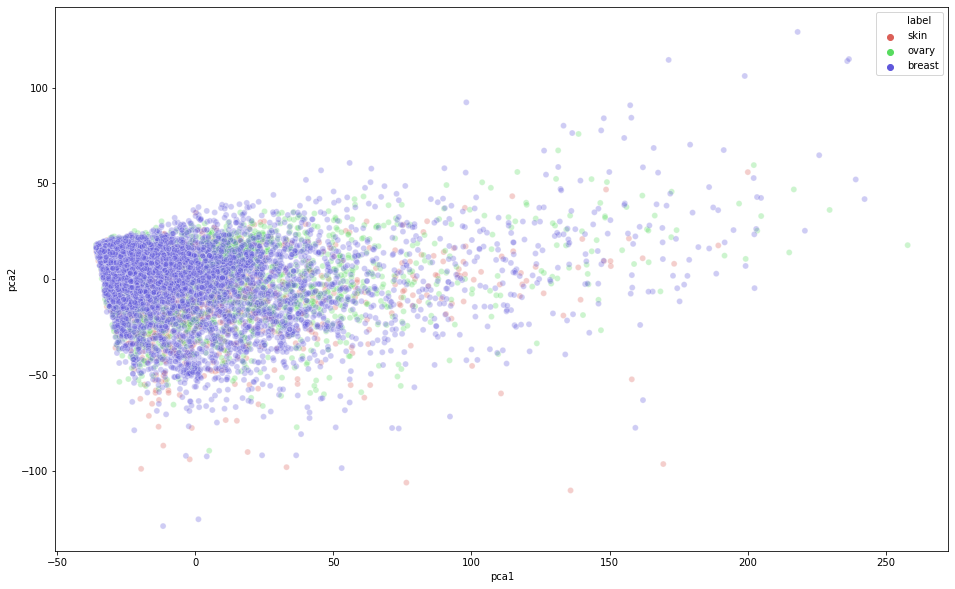

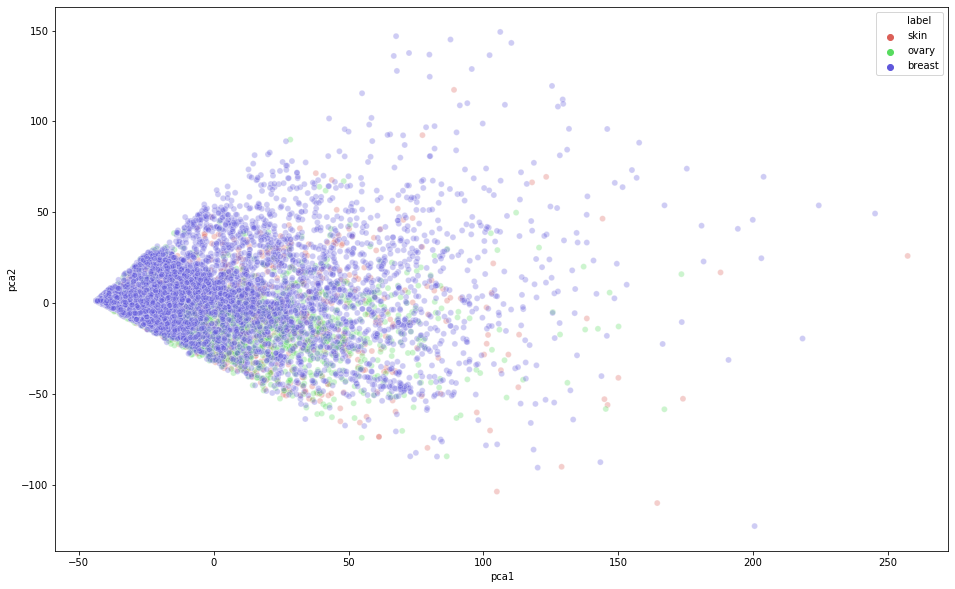

In [16]:
pca_data = runPCA(data, labels_cancer_type)
pca_data03 = runPCA(data_03, labels_cancer_type)

pca-TSNE

In [44]:
def pcaTSNE(data, labels ):
    # PCA 50
    pca_50_results, pca_50 = runPCA(data, labels, components=50, plot=False)
    print('Cumulative explained variation for 50 principal components: {}'.format(
        np.sum(pca_50.explained_variance_ratio_)))
    
    # TSNE
    time_start = time.time()
    pca_tsne = TSNE(random_state=RS).fit_transform(pca_50_results)
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
    
    # plot
    df = pd.DataFrame(pca_tsne, columns = ['ptsne1','ptsne2'])
    df['label'] = labels
    plt.figure(figsize=(16,10))
    ax = sns.scatterplot(
        x="ptsne1", y="ptsne2",
        hue="label",
        palette=sns.color_palette("hls", len(set(labels))),
        data=df,
        legend="full",
        alpha=0.3
    )
    
    return pca_tsne

PCA done! Time elapsed: 11.646172046661377 seconds
Variance explained per principal component: [0.17844345 0.05048163 0.03594471 0.0328566  0.02551243 0.02114567
 0.02057383 0.01831787 0.01779586 0.0171664  0.01567411 0.01531084
 0.01383526 0.01294229 0.01233048 0.01203863 0.01152473 0.01099804
 0.01051947 0.00966811 0.00944783 0.00916315 0.00858447 0.00794179
 0.00750751 0.00736567 0.00719843 0.00662615 0.006301   0.00575779
 0.00573253 0.00533628 0.00526004 0.00499217 0.00471269 0.00452822
 0.00438395 0.00430474 0.00409161 0.00402082 0.00387978 0.00359538
 0.00357652 0.00353486 0.00342322 0.00335692 0.0032205  0.00319323
 0.0030951  0.003073  ]
Cumulative explained variation for 50 principal components: 0.7002857832419358
t-SNE done! Time elapsed: 120.54272890090942 seconds
PCA done! Time elapsed: 2.5760440826416016 seconds
Variance explained per principal component: [0.23634979 0.08545305 0.0636012  0.04563361 0.03333133 0.03153163
 0.02758395 0.02430537 0.02227413 0.01903101 0.0185

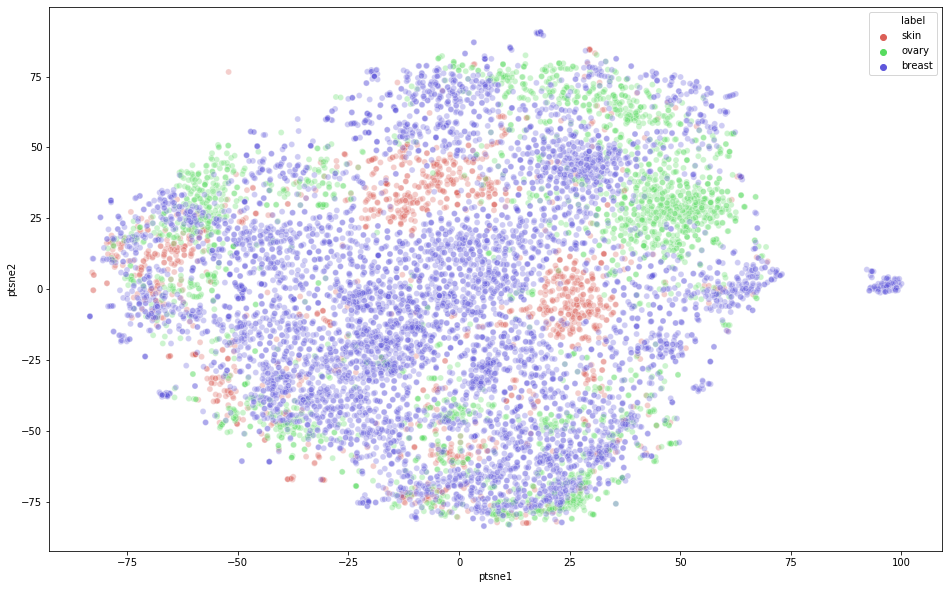

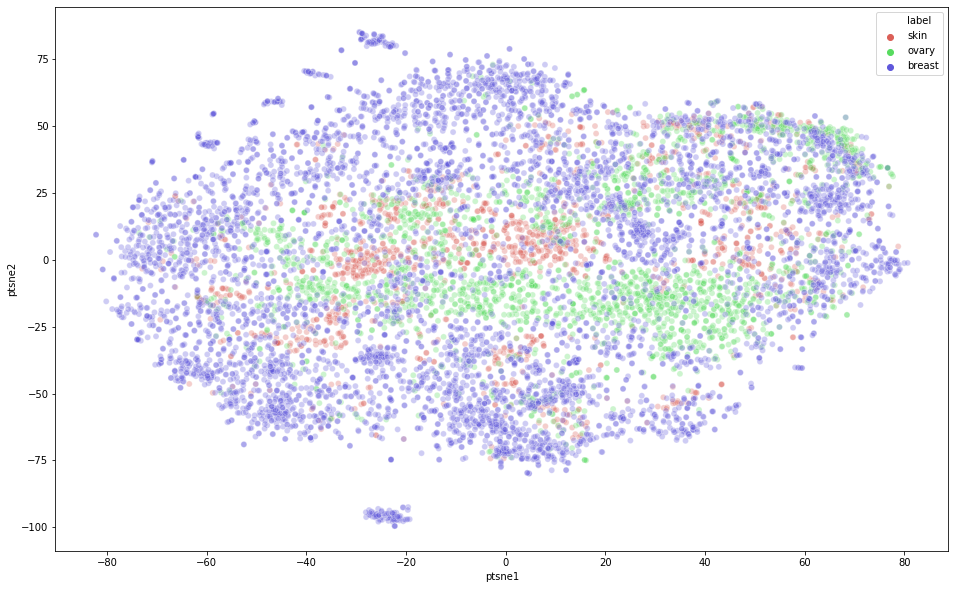

In [21]:
tsne_data = pcaTSNE(data, labels_cancer_type)
tsne_data03 = pcaTSNE(data_03, labels_cancer_type)

Data without arraymap breast

In [37]:
lables_no_breast_am = labels[labels != 'breast_arraymap']
labels_no_breast_am_cancer_type = [i.split('_')[0] for i in lables_no_breast_am]

In [30]:
data_no_breast_am = data[labels != 'breast_arraymap']

In [31]:
data_no_breast_am.shape

(4545, 38074)

In [32]:
data_03_no_breast_am = data_03[labels != 'breast_arraymap']
data_03_no_breast_am.shape

(4545, 8583)

PCA done! Time elapsed: 3.8407907485961914 seconds
Variance explained per principal component: [0.17155041 0.0475807  0.04317168 0.03266786]
PCA done! Time elapsed: 0.8633849620819092 seconds
Variance explained per principal component: [0.22140618 0.08092226 0.07082749 0.04759558]


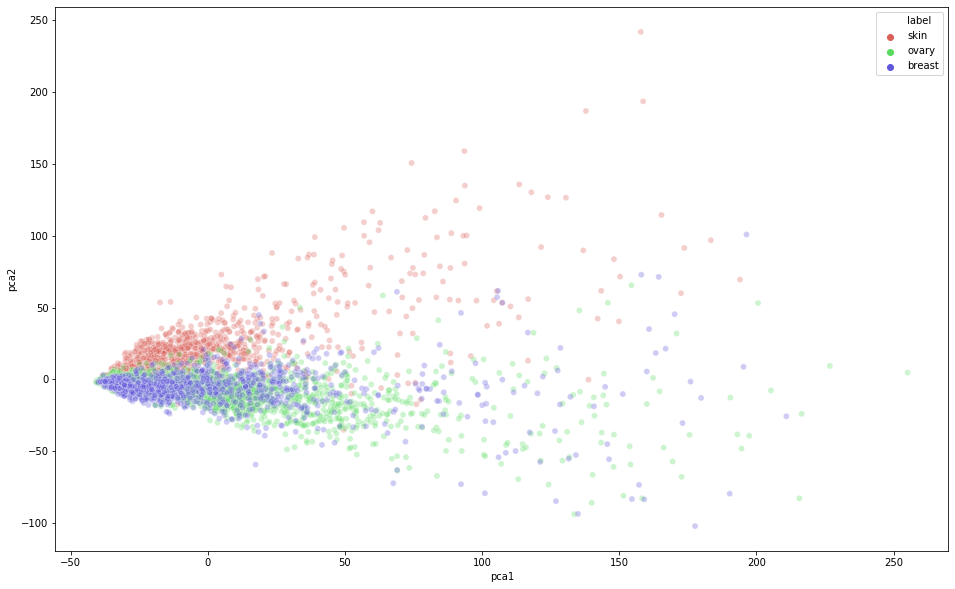

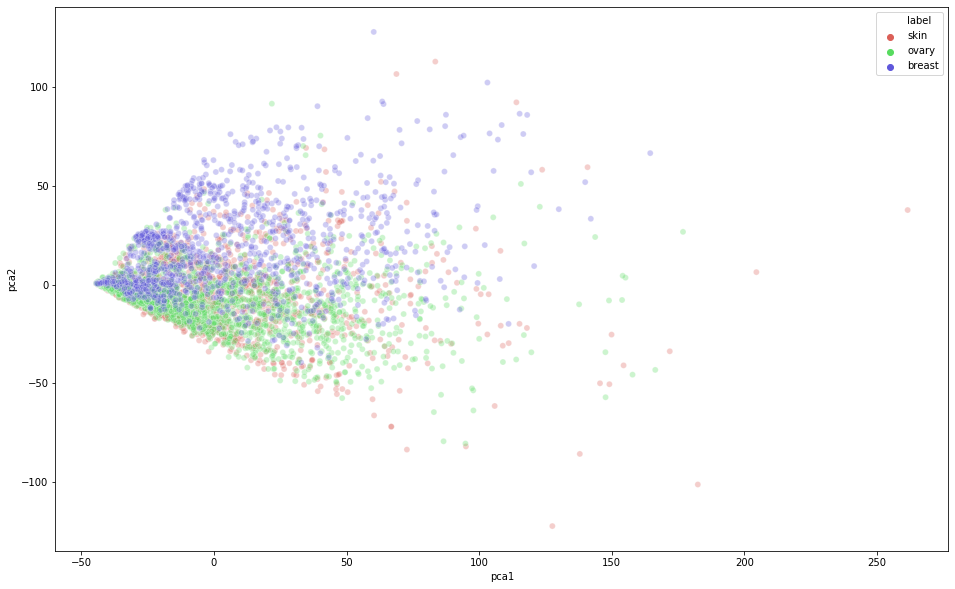

In [40]:
pca_data_no_breast_am = runPCA(data_no_breast_am, labels_no_breast_am_cancer_type)
pca_data_03_no_breast_am = runPCA(data_03_no_breast_am, labels_no_breast_am_cancer_type)

PCA done! Time elapsed: 6.1269590854644775 seconds
Variance explained per principal component: [0.17155041 0.0475807  0.04317168 0.0326679  0.02421141 0.02319944
 0.02212412 0.02049655 0.01954177 0.01829967 0.01761856 0.01626661
 0.0155126  0.01450902 0.01385429 0.01301515 0.01231626 0.01161415
 0.01043181 0.01011274 0.00954877 0.00881331 0.0084019  0.0079328
 0.00774528 0.0071694  0.00698466 0.00649557 0.00615343 0.006014
 0.00558662 0.00546093 0.00530245 0.00507675 0.00489873 0.00470607
 0.00446286 0.00440266 0.00425473 0.00411842 0.00400301 0.00387889
 0.00384284 0.00377801 0.00355277 0.0034427  0.003247   0.0032302
 0.00317005 0.00308521]
Cumulative explained variation for 50 principal components: 0.7168548593954498
t-SNE done! Time elapsed: 51.5473210811615 seconds
PCA done! Time elapsed: 1.3980951309204102 seconds
Variance explained per principal component: [0.22140618 0.08092226 0.07082749 0.04759558 0.04025798 0.03593517
 0.03138761 0.02657233 0.02400543 0.02325898 0.01974991 0

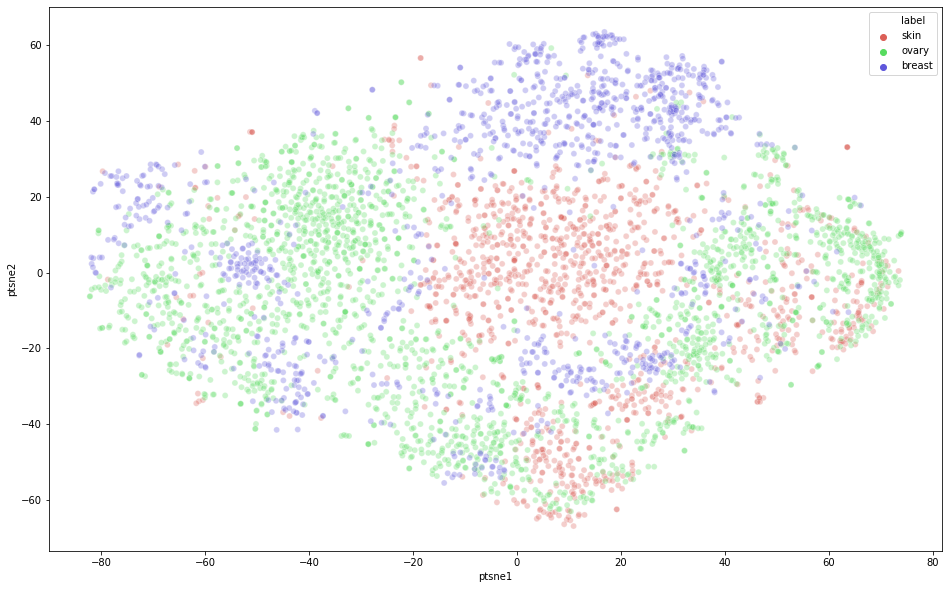

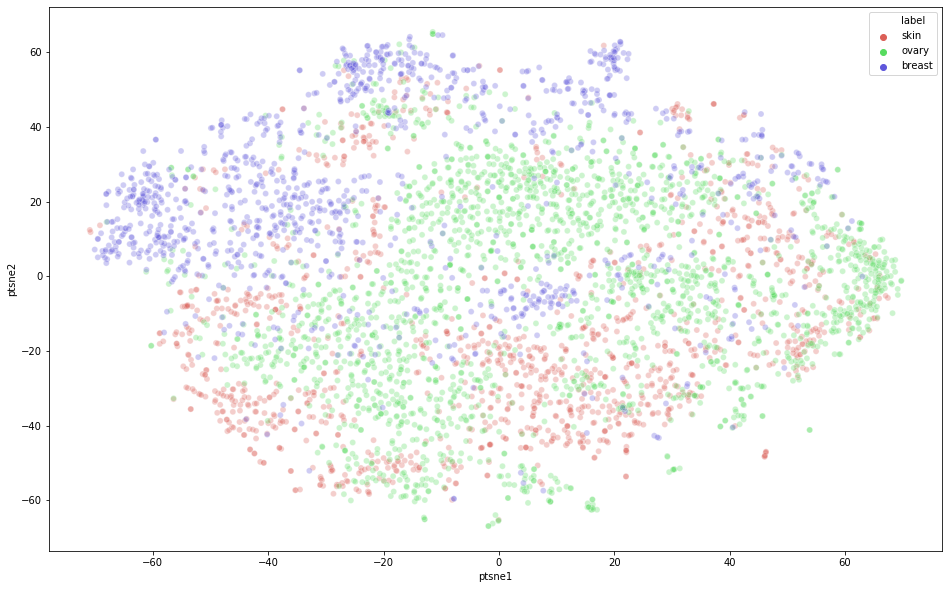

In [45]:
tsne_data_no_breast_am = pcaTSNE(data_no_breast_am, labels_no_breast_am_cancer_type)
tsne_data_03_no_breast_am = pcaTSNE(data_03_no_breast_am, labels_no_breast_am_cancer_type)

Scaled data

In [46]:
data_no_breast_am_scaled = preprocessing.MinMaxScaler().fit_transform(np.abs(data_no_breast_am))
data_03_no_breast_am_scaled = preprocessing.MinMaxScaler().fit_transform(np.abs(data_03_no_breast_am))

PCA done! Time elapsed: 4.103166103363037 seconds
Variance explained per principal component: [0.14600832 0.0629389  0.04782165 0.03305326]
PCA done! Time elapsed: 0.8576536178588867 seconds
Variance explained per principal component: [0.18868868 0.10492787 0.06365549 0.05684671]


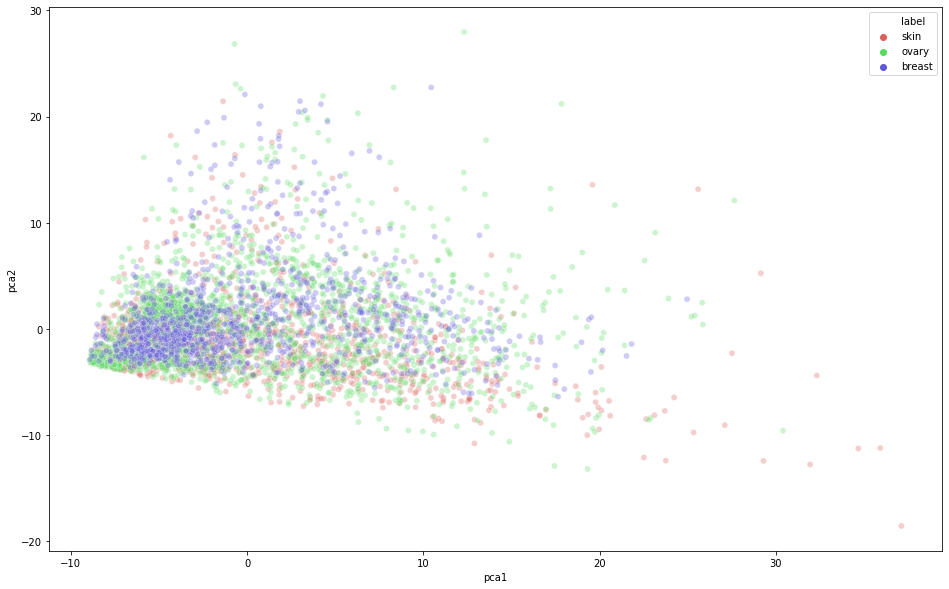

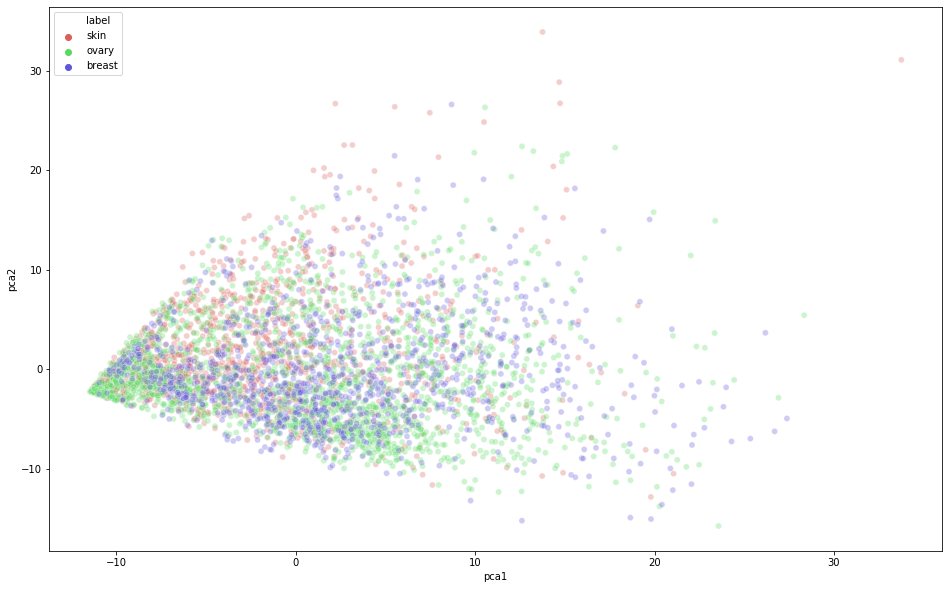

In [47]:
pca_data_no_breast_am_scaled = runPCA(data_no_breast_am_scaled, labels_no_breast_am_cancer_type)
pca_data_03_no_breast_am_scaled = runPCA(data_03_no_breast_am_scaled, labels_no_breast_am_cancer_type)

PCA done! Time elapsed: 5.852612257003784 seconds
Variance explained per principal component: [0.14600832 0.0629389  0.04782165 0.03305326 0.02545583 0.01957687
 0.01818513 0.01606746 0.01564815 0.0139301  0.01242581 0.01154763
 0.01118843 0.01098629 0.01068899 0.00989839 0.00953386 0.00934049
 0.00911489 0.00867595 0.00801804 0.00796905 0.00749626 0.00721689
 0.0070871  0.00691462 0.00680641 0.00668115 0.00633427 0.00632028
 0.00598891 0.00594139 0.00577859 0.00568117 0.00544335 0.00530434
 0.00520105 0.00492222 0.00485139 0.00480336 0.00453711 0.00453059
 0.00441125 0.00425652 0.0041971  0.00412289 0.00397627 0.00388517
 0.00381754 0.00373371]
Cumulative explained variation for 50 principal components: 0.6683144079917291
t-SNE done! Time elapsed: 45.02335214614868 seconds
PCA done! Time elapsed: 1.3152248859405518 seconds
Variance explained per principal component: [0.18868868 0.10492787 0.06365549 0.05684671 0.04594814 0.04133913
 0.03513895 0.03235278 0.02663664 0.022747   0.020216

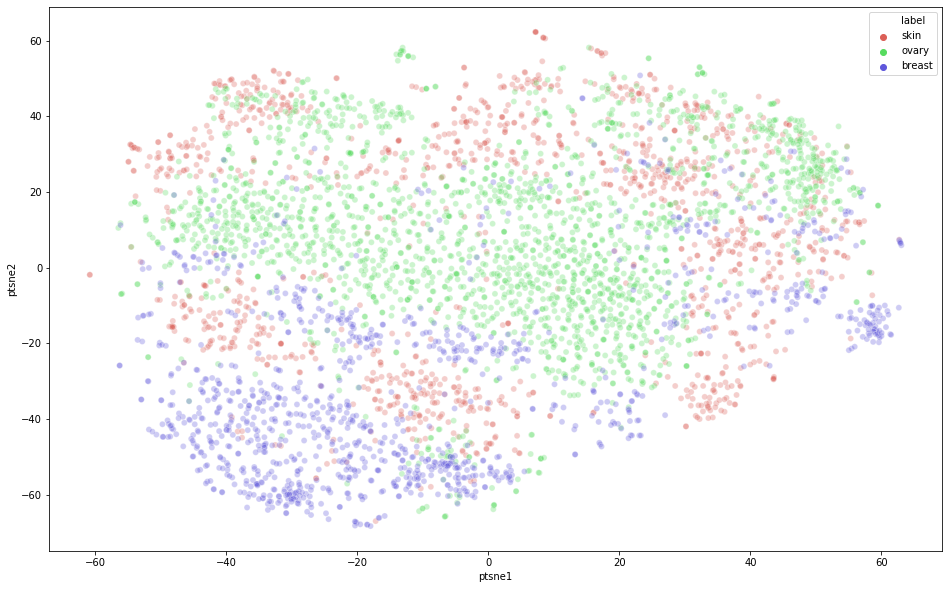

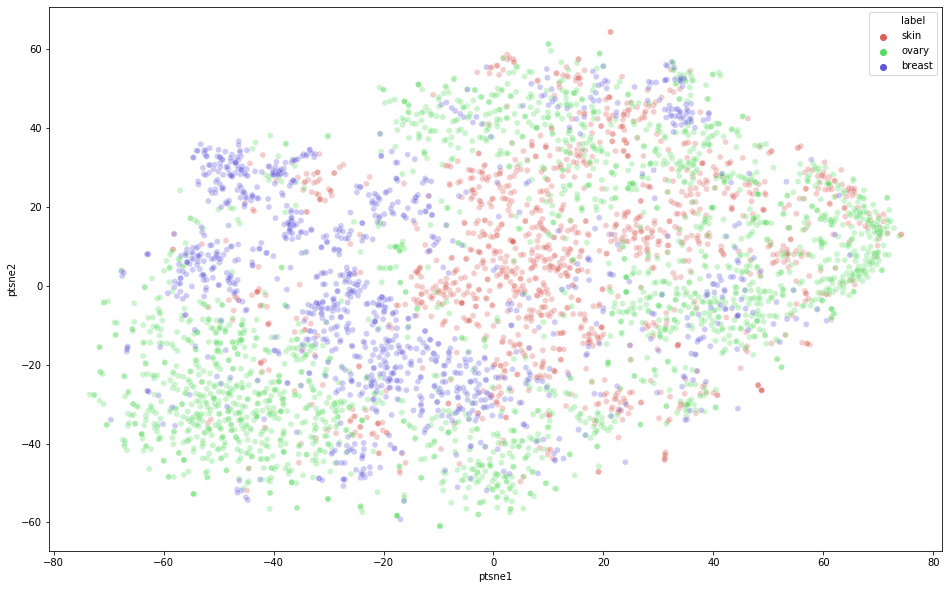

In [48]:
tsne_data_no_breast_am_scaled = pcaTSNE(data_no_breast_am_scaled, labels_no_breast_am_cancer_type)
tsne_data_03_no_breast_am_scaled = pcaTSNE(data_03_no_breast_am_scaled, labels_no_breast_am_cancer_type)

PCA done! Time elapsed: 5.813639879226685 seconds
Variance explained per principal component: [0.14600832 0.0629389  0.04782165 0.03305326 0.02545583 0.01957687
 0.01818513 0.01606746 0.01564815 0.0139301  0.01242581 0.01154763
 0.01118843 0.01098629 0.01068899 0.00989839 0.00953386 0.00934049
 0.00911489 0.00867595 0.00801804 0.00796905 0.00749626 0.00721689
 0.0070871  0.00691462 0.00680641 0.00668115 0.00633427 0.00632033
 0.00598888 0.00594137 0.00577773 0.00568124 0.00544348 0.00530417
 0.00520056 0.00492224 0.00485192 0.00480249 0.00453357 0.00452807
 0.00441052 0.00424968 0.00419094 0.00412401 0.00395935 0.00388437
 0.00379215 0.00371861]
Cumulative explained variation for 50 principal components: 0.6682358855114588
t-SNE done! Time elapsed: 43.8191978931427 seconds
PCA done! Time elapsed: 1.3467938899993896 seconds
Variance explained per principal component: [0.18868868 0.10492787 0.06365549 0.05684671 0.04594814 0.04133913
 0.03513895 0.03235278 0.02663664 0.022747   0.0202162

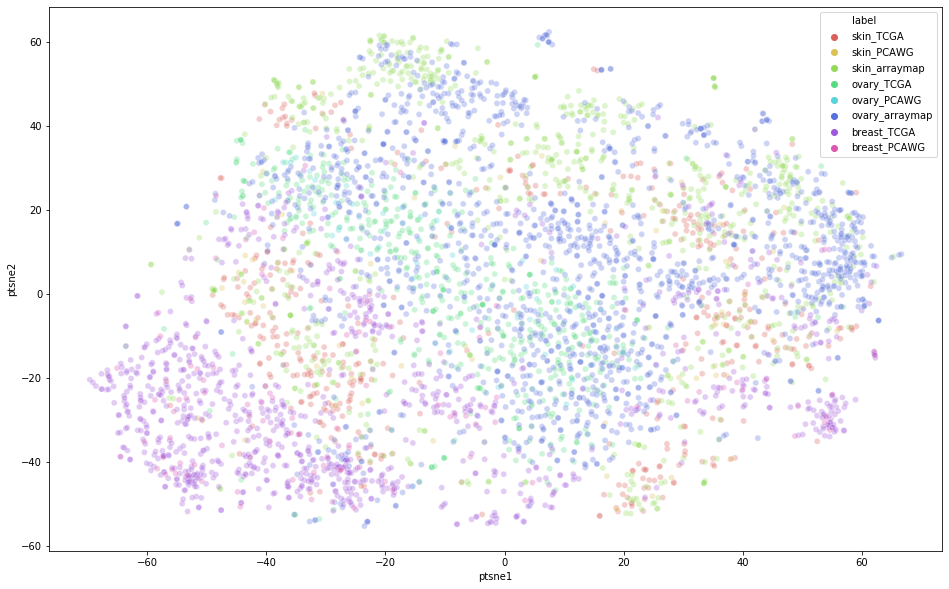

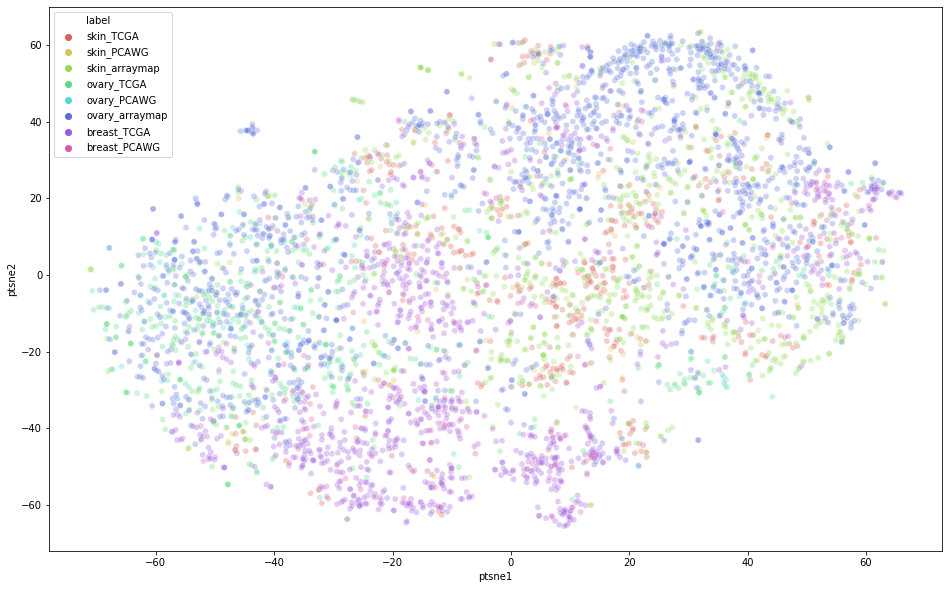

In [49]:
tsne_data_no_breast_am_scaled = pcaTSNE(data_no_breast_am_scaled, lables_no_breast_am)
tsne_data_03_no_breast_am_scaled = pcaTSNE(data_03_no_breast_am_scaled, lables_no_breast_am)

#### gene_0406 dataset

In [ ]:
filepath = '/Users/bogao/DataFiles/new landscape/data/sob_genes.pkl'
with open(filepath, 'rb') as fi:
    data = pickle.load(fi)